In [1]:
%matplotlib inline
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import cohen_kappa_score

In [2]:
results_file = 'Results_NLST.csv'
zmap = matplotlib.colors.LinearSegmentedColormap.from_list(
    "", ["#FFFFFF", "#4ba5ff", "#0054d9"], 300)

In [3]:
# Read results
cac_list = []
with open(results_file) as csv_pointer:
    csv_reader = csv.reader(csv_pointer, delimiter=',')
    for row in csv_reader:
        if row[0] == 'PID': #Skip header
            continue
        cac_list.append([row[0], float(row[1]), float(row[2])])

In [4]:
# Calculate stratified CAC scores
class_list = []
for cac in cac_list:
    class_1 = cac[1]
    if 0 < class_1 <= 100: class_1 = 1
    if 100 < class_1 <= 300: class_1 = 2
    if class_1 > 300: class_1 = 3
        
    class_2 = cac[2]
    if 0 < class_2 <= 100: class_2 = 1
    if 100 < class_2 <= 300: class_2 = 2
    if class_2 > 300: class_2 = 3
        
    class_list.append([int(class_1), int(class_2)])
class_list = np.array(class_list)

In [5]:
# Calculate Cohen's Kappa
kappa = cohen_kappa_score(class_list[:, 0], class_list[:, 1])
print 'Kappa:', kappa

Kappa: 0.6177872074014817


In [6]:
# Transform results into matrix for plot
class_matrix = np.zeros((4, 4), dtype=int)
for i in range(class_list.shape[0]):
    class_matrix[class_list[i, 0], class_list[i, 1]] += 1

In [7]:
# Calculate concordance rate
conc = 0.
non_conc = 0.
for y in range(class_matrix.shape[0]):
    for x in range(class_matrix.shape[1]):
        if y == x:
            conc += class_matrix[y, x]
        else:
            non_conc += class_matrix[y, x]
conc_rate = conc / (conc + non_conc)
print 'Concordance rate:', conc_rate

Concordance rate: 0.719696969697


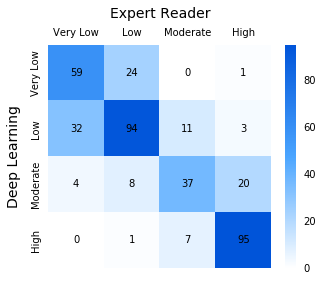

In [12]:
# Plot concordance tables
fig, ax = plt.subplots(1, 1, figsize=(5, 4.1))
heatmap = ax.pcolor(class_matrix, cmap=zmap, vmin=0, vmax=np.max(class_matrix))

ax.set_xticks(np.arange(class_matrix.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(class_matrix.shape[0]) + 0.5, minor=False)

ax.invert_yaxis()
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')

for spine in ax.spines.values():
    spine.set_visible(False)

plt.tick_params(axis='x', which='both', bottom=False, top=False)
plt.tick_params(axis='y', which='both', left=False, right=False)

ax.set_xticklabels(['Very Low','Low', 'Moderate', 'High'], minor=False)
ax.set_yticklabels(['Very Low','Low', 'Moderate', 'High'], minor=False, rotation=90, va='center')

for y in range(class_matrix.shape[0]):
    for x in range(class_matrix.shape[1]):
        plt.text(x + 0.5, y + 0.5, class_matrix[y, x], horizontalalignment='center',
                 verticalalignment='center')

heatmap.set_clim(vmin=0, vmax=np.max(class_matrix))

cbar = plt.colorbar(heatmap)
cbar.outline.set_visible(False)
cbarytks = plt.getp(cbar.ax.axes, 'yticklines')
plt.setp(cbarytks, visible=False)

plt.xlabel('Expert Reader', fontsize=14, weight='medium', labelpad=10)
plt.ylabel('Deep Learning', fontsize=14, weight='medium', labelpad=10)

plt.show()
plt.close(fig)